In [1]:
# Pobranie przykladowych danych
from sklearn.datasets import fetch_california_housing

# Data wrangling 
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import express as px

# Inne
import datetime as dt

# 1. Data visualization

### Housing

In [2]:
# Funkcja do przygotowania ramki danych
def data_preparation():
    """Data preparation."""
    
    # Load data
    housing = fetch_california_housing()
    
    # Data Array
    df_array = housing.data.copy() # copying in order to avoid modification of the original data 
    target = housing.target.copy()
    target = target.reshape(len(target), 1)
    
    df_array = np.concatenate([df_array, target], axis=1)
    
    # Colnames
    colnames = housing.feature_names.copy()
    colnames.append(housing.target_names[0])
    
    # Data Frame
    df = pd.DataFrame(df_array, columns=colnames)
    
    return df

In [3]:
# Pobranie danych

## Housing
housing = data_preparation()
housing

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [4]:
# Data transformation
housing['AveRooms'] = housing['AveRooms'].astype(int) # convert to int
housing['AveBedrms'] = housing['AveBedrms'].astype(int)

# Feature Engineering
housing['AveRooms_greater_5'] = np.where(housing['AveRooms'] > 5, '>5', '<=5')
housing['MedInc_greater_5'] = np.where(housing['MedInc'] > 5, '>5', '<=5')
housing

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0         6          1       322.0  2.555556     37.88   
1      8.3014      21.0         6          0      2401.0  2.109842     37.86   
2      7.2574      52.0         8          1       496.0  2.802260     37.85   
3      5.6431      52.0         5          1       558.0  2.547945     37.85   
4      3.8462      52.0         6          1       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0         5          1       845.0  2.560606     39.48   
20636  2.5568      18.0         6          1       356.0  3.122807     39.49   
20637  1.7000      17.0         5          1      1007.0  2.325635     39.43   
20638  1.8672      18.0         5          1       741.0  2.123209     39.43   
20639  2.3886      16.0         5          1      1387.0  2.616981     39.37   

       Longitude  MedHouseVal AveRooms_greater_5 MedInc_greater_5  
0        -122.23        4.526                 >5               >5  
1        -122.22        3.585                 >5               >5  
2        -122.24        3.521                 >5               >5  
3        -122.25        3.413                <=5               >5  
4        -122.25        3.422                 >5              <=5  
...          ...          ...                ...              ...  
20635    -121.09        0.781                <=5              <=5  
20636    -121.21        0.771                 >5              <=5  
20637    -121.22        0.923                <=5              <=5  
20638    -121.32        0.847                <=5              <=5  
20639    -121.24        0.894                <=5              <=5  

[20640 rows x 11 columns]

Przed przystąpieniem do wizualizacji należy zaznaczyć, które z powyższych zmiennych to zmienna celu, a które to zmienne objaśniające.

Zmienna celu: MedHouseVal

Zmienne objaśniające: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

### FMRI

Opis: Funkcjonalne obrazowanie rezonansem magnetycznym lub funkcjonalny MRI (fMRI) mierzy aktywność mózgu za pomocą silnego, statycznego pola magnetycznego w celu wykrycia zmian związanych z przepływem krwi. Kiedy używany jest obszar mózgu, przepływ krwi do tego obszaru również wzrasta. Zwiększony przepływ krwi jest reprezentowany przez sygnał o wyższej amplitudzie, postrzegany jako silna aktywność nerwowa.

In [5]:
## Fmri
fmri = sns.load_dataset("fmri")

print(f'Wymiar ramki danych: {fmri.shape}')
print(f'Nazwy kolumn: {fmri.columns.values}')

fmri.head()

Wymiar ramki danych: (1064, 5)
Nazwy kolumn: ['subject' 'timepoint' 'event' 'region' 'signal']


subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

### Tips

Opis: Ramka danych opierająca się na informacjach reprezentujących niektóre dane dotyczące napiwków, w których jeden kelner zapisał informacje o każdym napiwku, który otrzymał w ciągu kilku miesięcy pracy w jednej restauracji. Kelner zebrał kilka zmiennych: napiwek w dolarach, rachunek w dolarach, płeć płatnika rachunku, czy na imprezie byli palacze, dzień tygodnia, pora dnia i wielkość imprezy.

In [6]:
## Tips
tips = sns.load_dataset("tips")

print(f'Wymiar ramki danych: {tips.shape}')
print(f'Nazwy kolumn: {tips.columns.values}')

tips.head()

Wymiar ramki danych: (244, 7)
Nazwy kolumn: ['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Zmienna celu: tip

Zmienne objaśniające: total_bill, sex, smoker, day, time, size

### Anscombe

Opis: Kwartet Anscombe’a to zestaw czterech zestawów danych o identycznych cechach statystycznych, takich jak średnia arytmetyczna, wariancja, współczynnik korelacji czy równanie regresji liniowej, jednocześnie wyglądających zgoła różnie przy przedstawieniu graficznym. Układ tych danych został stworzony w 1973 roku przez brytyjskiego statystyka Francisa Anscombe’a aby ukazać znaczenie graficznej reprezentacji danych przy okazji ich analizy statystycznej.

In [7]:
## Anscombe
anscombe = sns.load_dataset("anscombe")

print(f'Wymiar ramki danych: {anscombe.shape}')
print(f'Nazwy kolumn: {anscombe.columns.values}')

anscombe.head()

Wymiar ramki danych: (44, 3)
Nazwy kolumn: ['dataset' 'x' 'y']


dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [8]:
anscombe.groupby(['dataset']).agg({
    'x': ['mean', 'std', 'min', 'max'],
    'y': ['mean', 'std', 'min', 'max']
})

x                              y                       
        mean       std  min   max      mean       std   min    max
dataset                                                           
I        9.0  3.316625  4.0  14.0  7.500909  2.031568  4.26  10.84
II       9.0  3.316625  4.0  14.0  7.500909  2.031657  3.10   9.26
III      9.0  3.316625  4.0  14.0  7.500000  2.030424  5.39  12.74
IV       9.0  3.316625  8.0  19.0  7.500909  2.030579  5.25  12.50

# Wizualizacja zależności statystycznych

Analiza statystyczna to proces zrozumienia, w jaki sposób zmienne w zbiorze danych są ze sobą powiązane i jak te relacje zależą od innych zmiennych. Wizualizacja może być kluczowym elementem tego procesu, ponieważ gdy dane są odpowiednio wizualizowane, możemy dostrzec trendy i wzorce wskazujące na związek między nimi. Przeprowadzenie dokładnej analizy statystycznej jest procesem często niezbędnym w pierwszej fazie projektu, gdyd dobre zrozumienie danych jest kluczowe przed przystąpieniem do dalszych etapów projektu.

In [9]:
sns.set_theme(style="darkgrid")

### Badanie relacji między zmiennymi przy użyciu wykresu punktowego

Wykres punktowy jest podstawą wizualizacji statystycznej. Pozwala nam odpowiedzieć na kilka podstwowych pytań:

- Czy istnieje jakakolwiek zależność między dwiema zmiennymi?
- Czy istnieją obserwacje nietypowe (anomalie)?
- Czy dane układają nam się może w jakieś podgrupy?

Text(0.5, 1.0, 'Wykres punktowy')

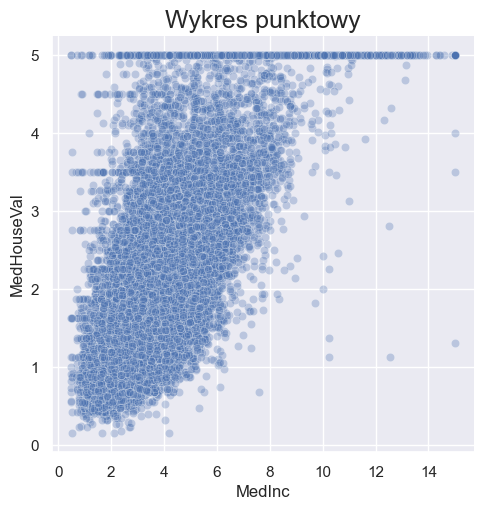

In [10]:
sns.relplot(x="MedInc", y="MedHouseVal", data=housing, alpha=0.3)
plt.title('Wykres punktowy', fontsize=18)

### Info
W wielu rodzajach wizualizacji pojawia sie parametr alpha. Sluzy on do ustawienia przezroczystosci wykresu. Zdefiniowanie tego parametru jest szczegolnie przydatne, gdy wiele obserwacji nachodzi na siebie. Dzieki ustawieniu malej wartosci alpha jestesmy w stanie okreslic w jakim obszarze wystepuja najczesciej nasze dane.


W przypadku biblioteki matplotlib wykres wyglądał by następująco:

Text(0.5, 1.0, 'Wykres punktowy')

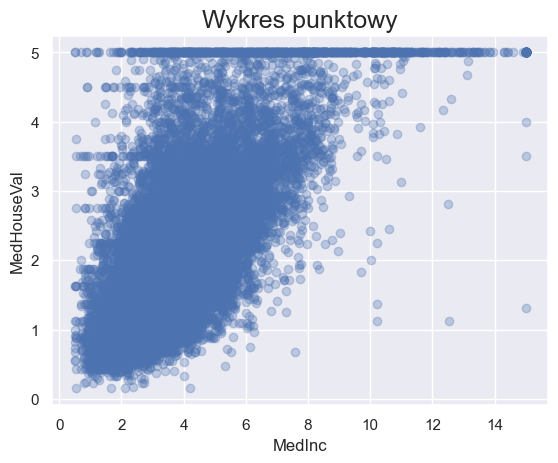

In [11]:
plt.scatter(x=housing['MedInc'], y=housing['MedHouseVal'], alpha=0.3)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Wykres punktowy', fontsize=18)

### Info
Z uwagi na to, że pod spodem biblioteki seaborn działa matplotlib to wiele funkcji, działająych dla matplotlib tj. xlabel, ylabel, title działa również dla seaborn.

W przypadku biblioteki seaborn w prosty sposób można dodać dodatkową relację do tego rodzaju wykresu. Dodając parameter hue, mamy możliwość sprawdzić powyższą relację względem zmiennej kategorycznej.

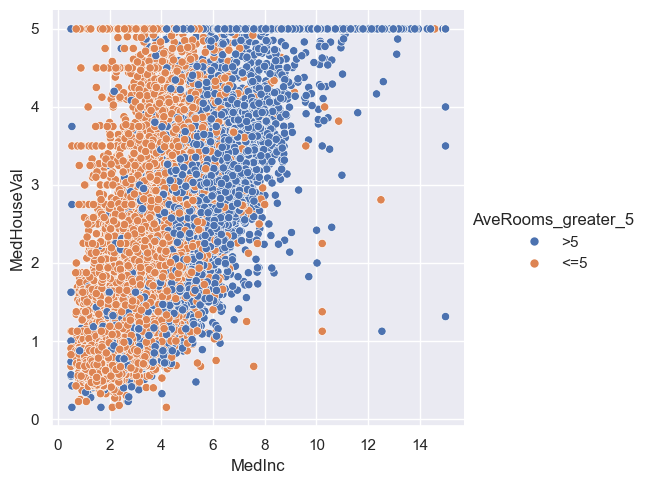

In [12]:
sns.relplot(x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", data=housing)

Aby sprawdzić kolejną relację, mamy możliwość dodania zmiennej kategorycznej która będzie charakteryzowała się innym znacznikiem - do tego służy parametr style.

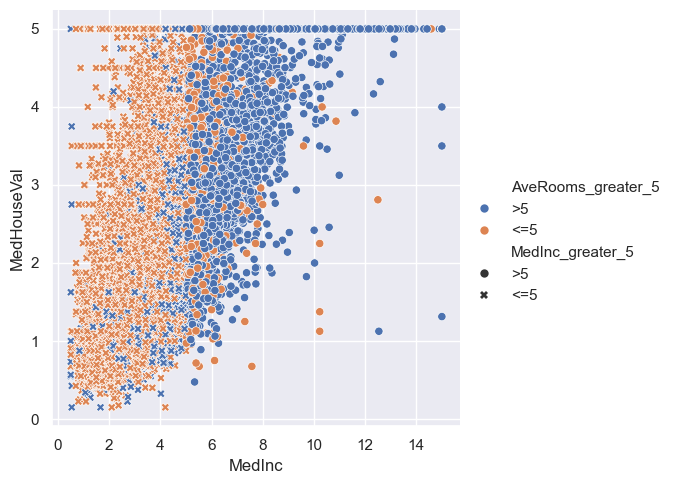

In [13]:
sns.relplot(x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", style="MedInc_greater_5", data=housing)

# TO DO PLOTLY
Bardzo często podczas pracy z danymi chcemy mieć możliwość pracy interaktywnej z naszymi danymi - w tym przypadku bardzo pomocny jest pakiet plotly.

In [14]:
# Wizualizacja - plotly
fig = px.scatter(data_frame=housing, x='MedInc', y='MedHouseVal', color='MedInc_greater_5', title='Wykres punktowy')
fig.show()

### Podkreślenie relacji liniowych między zmiennymi

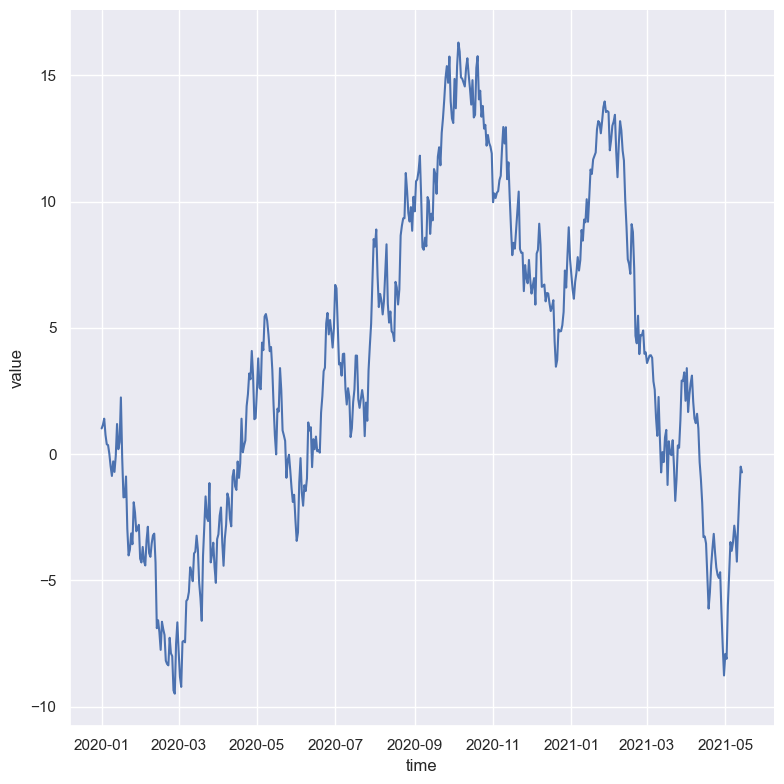

In [15]:
import datetime as dt

n = 500
start = dt.date(2020, 1, 1)
end = start + dt.timedelta(days=n-1)

df_dict = dict(
    time=pd.date_range(start, end),
    value=np.random.randn(n).cumsum()
)

df = pd.DataFrame(df_dict)
g = sns.relplot(x="time", y="value", kind="line", data=df, height=8)

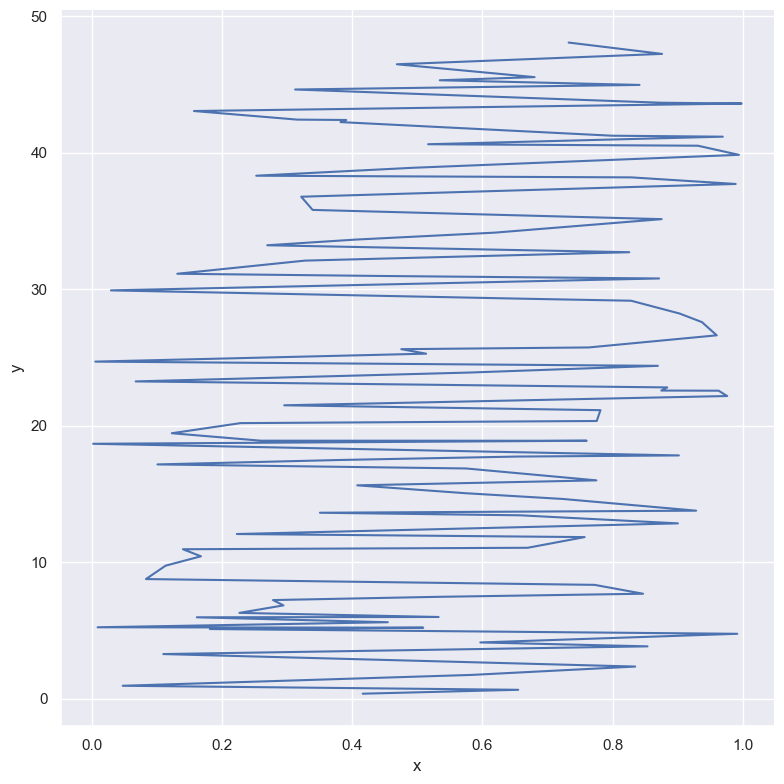

In [16]:
# co sie stanie jesli nie posortujemy wykresu od razu
df_dict = dict(
    x=np.random.rand(100),
    y=np.random.rand(100).cumsum()
)

df = pd.DataFrame(df_dict)
g = sns.relplot(x="x", y="y", kind="line", sort = False, data=df, height=8)
# a tego nie chcemy

### Wizualizacja w przypadku agregacji danych

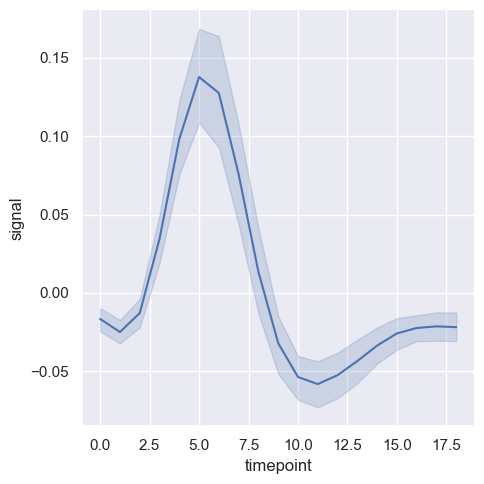

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Czasami wykreślenie przedziału ufności może być czasochłonne, dlatego jest możliwość wyłączenia tego wykorzystując parametr ci. # confidence interval == errorbar

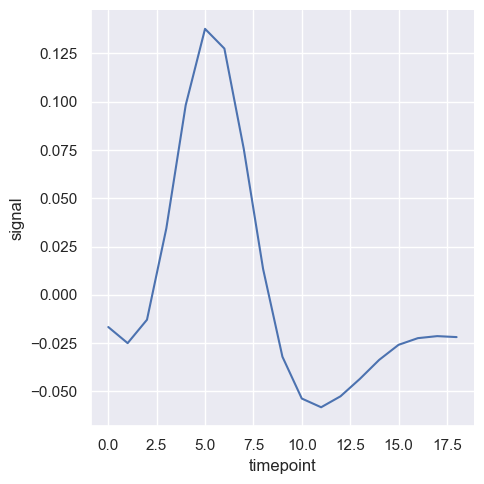

In [18]:
sns.relplot(x="timepoint", y="signal", errorbar=None, kind="line", data=fmri);

Inną interesującą opcją jest wykreślenie przedziału ufności jako wartość odchylenia standardowego dla danej zmiennej.

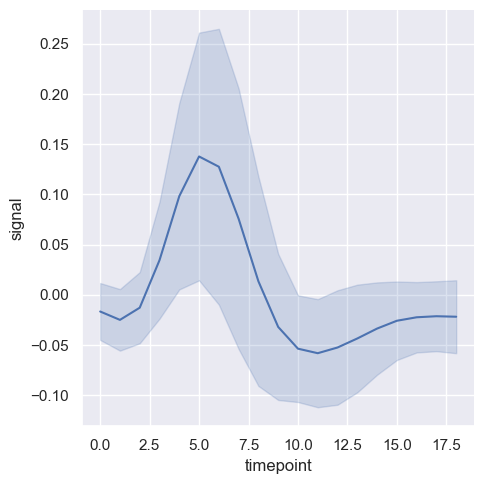

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", errorbar="sd", data=fmri);

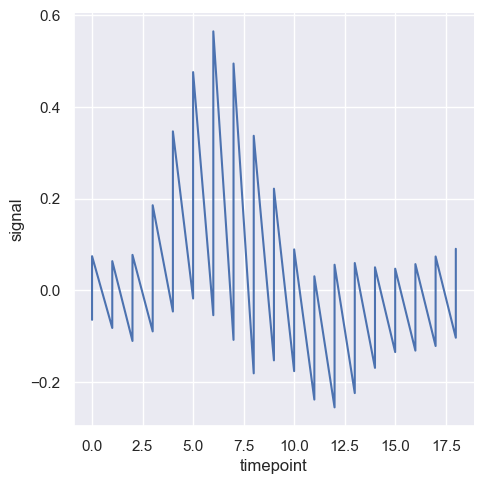

In [20]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

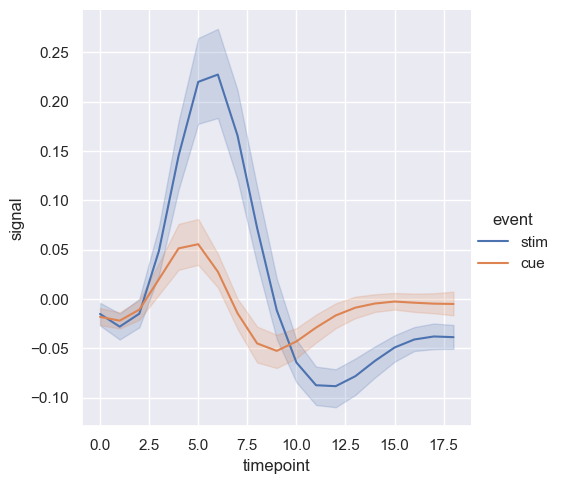

In [21]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

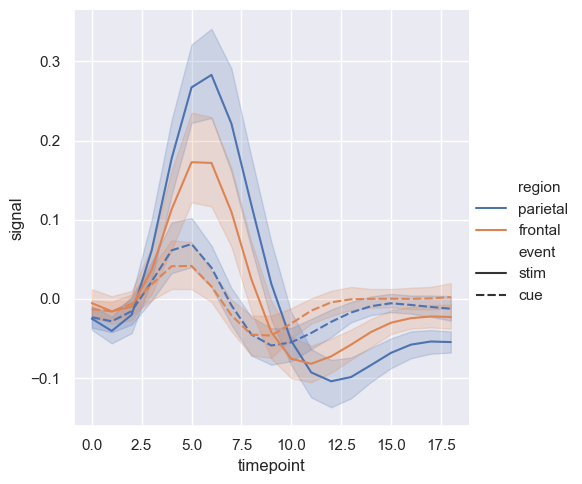

In [22]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

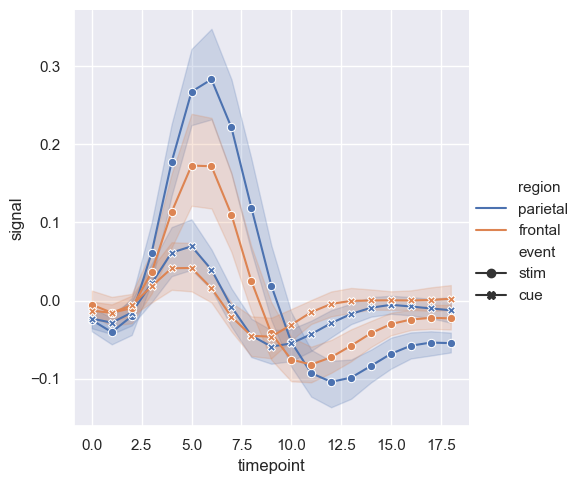

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

Taki sam typ wykresu można przedstawić przy pomocy biblioteki matplotlib jednak wtedy wymagana jest większa liczba operacji na danych.

In [24]:
# Data preparation
fmri_agg = fmri.sort_values(by='timepoint').groupby(['timepoint', 'event', 'region']).agg({'signal': 'mean'}).reset_index()

print(f'Wymiar ramki danych: {fmri_agg.shape}')
print(f'Nazwy kolumn: {fmri_agg.columns.values}')

Wymiar ramki danych: (76, 4)
Nazwy kolumn: ['timepoint' 'event' 'region' 'signal']


Text(0, 0.5, 'Signal')

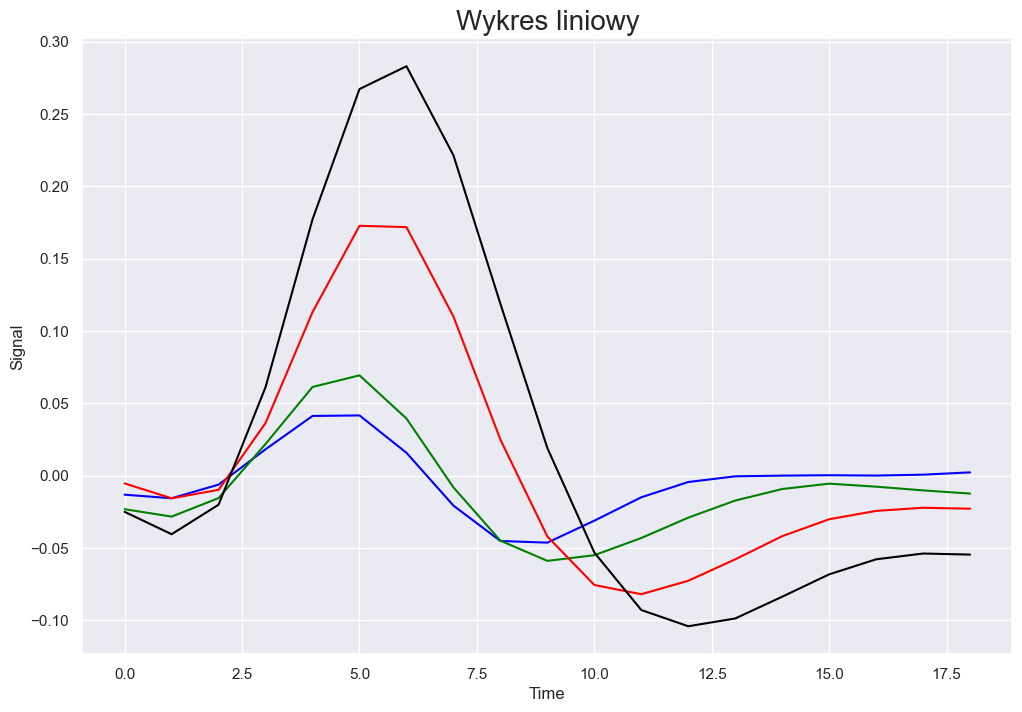

In [25]:
# Data filters
mask1 = (fmri_agg['event'] == 'cue') & (fmri_agg['region'] == 'frontal')
mask2 = (fmri_agg['event'] == 'cue') & (fmri_agg['region'] == 'parietal')
mask3 = (fmri_agg['event'] == 'stim') & (fmri_agg['region'] == 'frontal')
mask4 = (fmri_agg['event'] == 'stim') & (fmri_agg['region'] == 'parietal')

plt.figure(figsize=(12, 8))

plt.plot('timepoint', 'signal', data=fmri_agg[mask1], color='blue')
plt.plot('timepoint', 'signal', data=fmri_agg[mask2], color='green')
plt.plot('timepoint', 'signal', data=fmri_agg[mask3], color='red')
plt.plot('timepoint', 'signal', data=fmri_agg[mask4], color='black')
plt.title('Wykres liniowy', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Signal')

### Prezentacja wielu relacji na róznych polach wykresu

Czasami chcemy zrozumieć jakie zachodzą relację między zmiennymi wizualizując je na oddzienlych polach wykresu. W tym przypadku przydatnym staję się parametr col lub row.

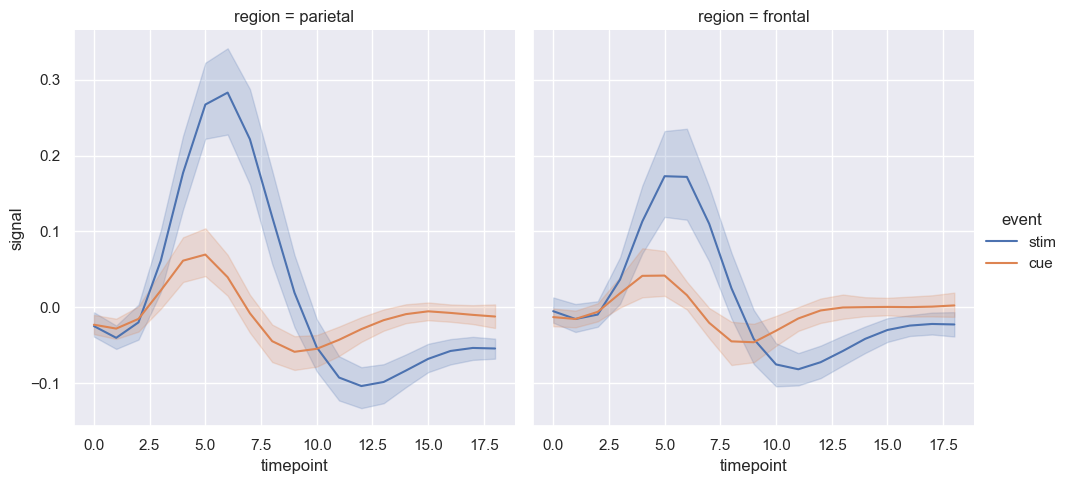

In [26]:
sns.relplot(x="timepoint", y="signal", hue="event",
            col="region", kind='line', data=fmri)

W tym przypadku przydatny okazuje się także wykres oparty o plotly. Jego podstawowa forma wygląda następująco:

In [27]:
fig = px.line(data_frame=fmri_agg, x='timepoint', y='signal', color='event', facet_col='region', title='Wykres liniowy')
fig.show()

Czasami do wykresy opartego o seaborn warto dodać parametr col_wrap, który umożliwia nam zdefiniowanie liczby kolumn dla danej wizualizacji.

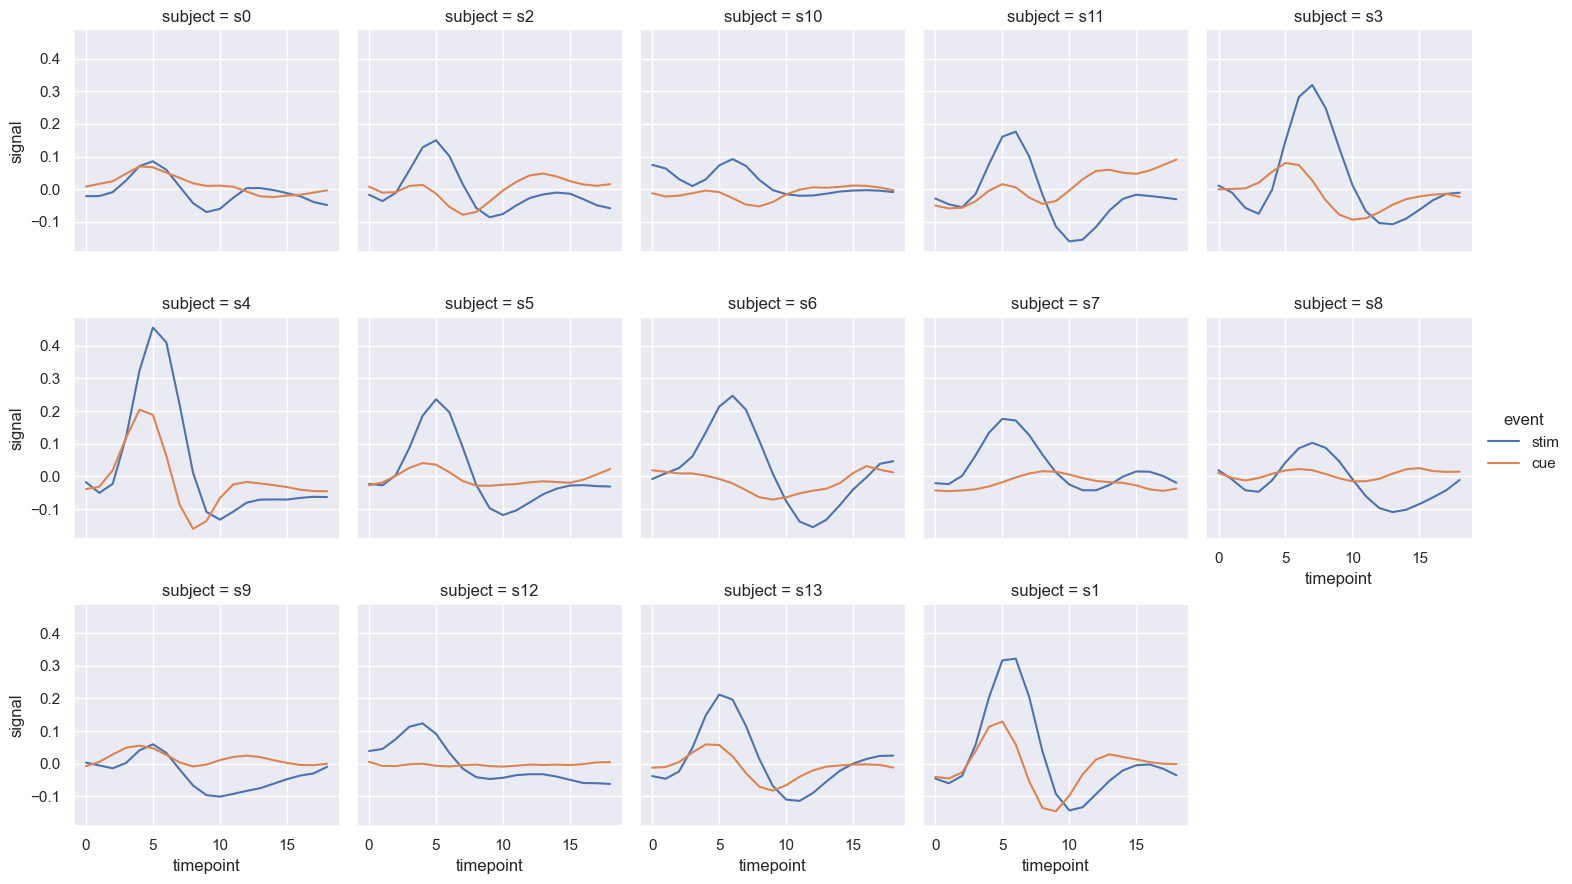

In [28]:
sns.relplot(x="timepoint", y="signal", hue="event", col="subject", 
            col_wrap=5, kind='line', data=fmri.query("region == 'frontal'"), height=3)

# Wizualizacja rozkładu zmiennych

Jednym z pierwszych kroków podczas budowy modeli uczenia maszynowego powinno być zrozumienie, w jaki sposób rozkładają się zmienne. Techniki wizualizacji rozkładu zmiennych mogą dostarczyć szybkich odpowiedzi na wiele ważnych pytań. Jaki zakres obejmują obserwacje? Jaka jest ich główna tendencja? Czy są mocno przekrzywione w jednym kierunku? Czy istnieją znaczące wartości odstające? Czy odpowiedzi na te pytania różnią się w podzbiorach zdefiniowanych przez inne zmienne?


Biblioteka seaborn zawiera kilka bardzo przydatnych funkcji pod kątem badania rozklładu tj. histplot(), kdeplot(), ecdfplot() i rugplot(). Są one zgrupowane w ramach funkcji displot(), jointplot() i pairplot().


Istnieje kilka różnych podejść do wizualizacji rozładu zmiennych, a każde z nich ma swoje względne zalety i wady. Ważne jest, aby zrozumieć te czynniki, aby wybrać najlepsze podejście do konkretnego celu.

### Rozkład zmiennej jednowymiarowej

Najczęstszym podejściem do wizualizacji rozkładu jest histogram, który jest graficzną reprezentacją danych, która agreguje grupę punktów w zakresy określone przez analityka. Podobnie jak w przypadku wykresu słupkowego, histogram kondensuje obserwacje w łatwo interpretowalną wizualizację. Histogram jest jedną z podstawowych form wizualizacji wykorzystywaną w celu określenie rozkładu danej cechy. Podczas pracy z danymi często kluczym jest aby określić w jaki sposób rozkładają się nasze dane - takie informacje można wtedy wykorzystać w dalszej pracy m.in. określając rodzaj algorytmu czy dokonując różnego rodzaju transformacji danej zmiennej.

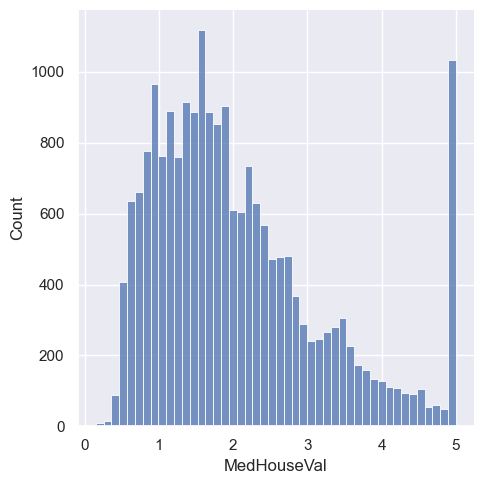

In [29]:
sns.displot(housing, x="MedHouseVal")

W przypadku histogramu bardzo ważną rolę odgrywają parametry bins lub binwdith, które mówią nam o wielkości lub długości przedziałów dla histogramu. Te same dane przedstawione z inną wartością parametru binwidth mogą nam odpowiedzieć na zadane pytanie w zupełnie inny sposób. Przykładam jesy poniższy histogram na którym nie widać żadnych anomalii dla wartości zmiennej równej 5.

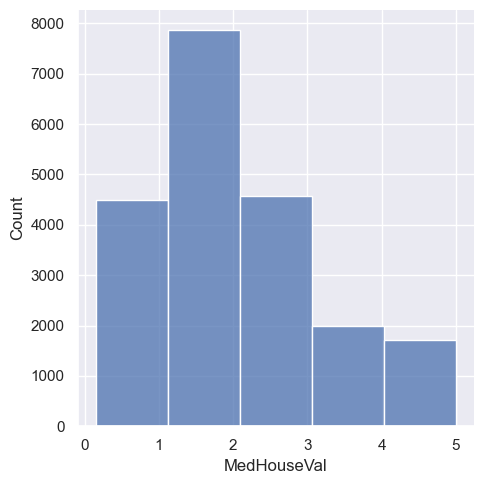

In [30]:
sns.displot(housing, x="MedHouseVal", binwidth=1)

Dodatkowo pokażmy jak ten samy wykres wyglądałby z wykorzystaniem pakietów matplotlib oraz plotly - oczywiście poniższe wizualizację uwzględniają domyślne opcję.

Text(0.5, 0, 'MedHouseVal')

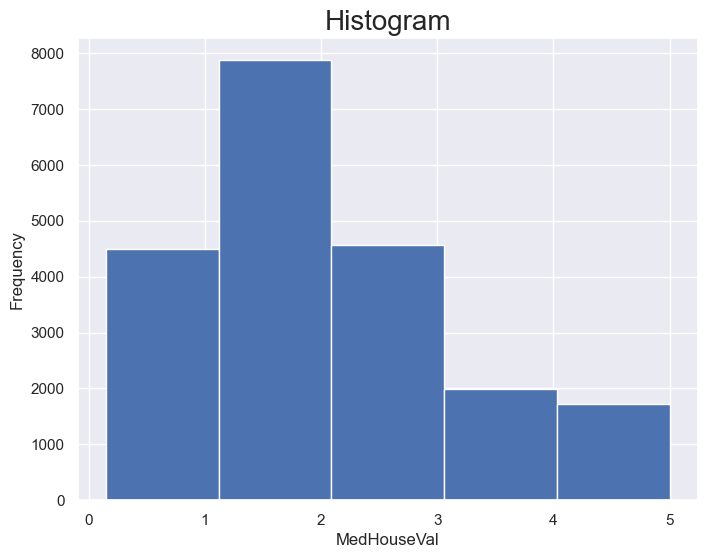

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(x='MedHouseVal', data=housing, bins=5)
plt.title('Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('MedHouseVal')        

In [32]:
fig = px.histogram(data_frame=housing, x='MedHouseVal', nbins=5, title='Histogram')
fig.show()

### Wizualizacja zmiennych kategorycznych

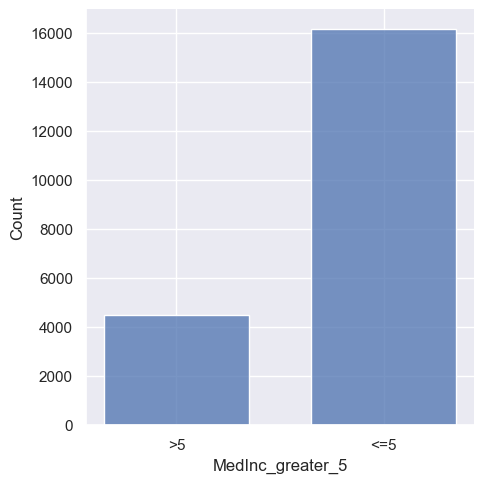

In [33]:
sns.displot(housing, x="MedInc_greater_5", shrink=0.7)

### Rozkład warunkowy względem innych zmiennych

Po zrozumieniu rozkładu zmiennej, następnym krokiem jest często pytanie, czy cechy tego rozkładu różnią się od innych zmiennych w zbiorze danych. displot zapewnia obsługę podzbiorów warunkowych poprzez barwy.

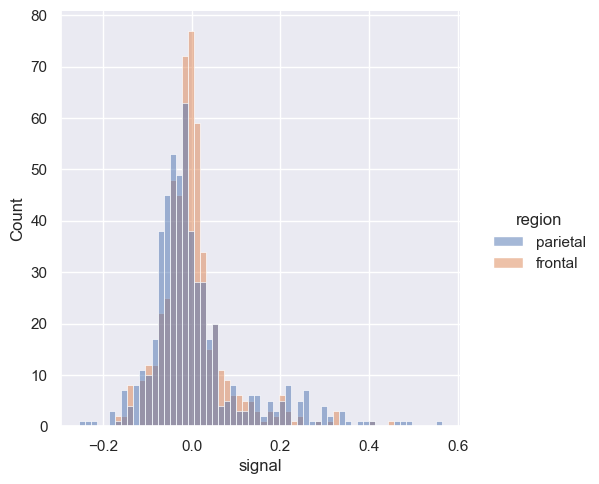

In [34]:
sns.displot(fmri, x='signal', hue="region")

Czasam warto nieco zmienić wizualizacje naszych danych poprzez zmianę wartości parametru element na step. Pomaga to czasem nieco lepiej zauwazyć różnicę w danych.

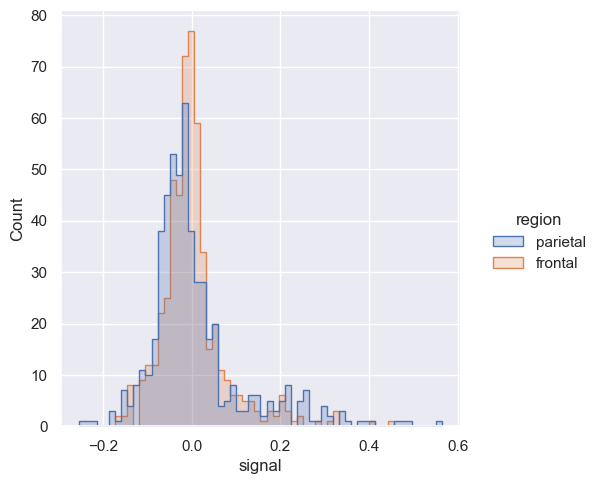

In [35]:
sns.displot(fmri, x='signal', hue="region", element='step')

Innym rozwiązaniem jest pokazanie rozkładów, które się na siebie nakładają.

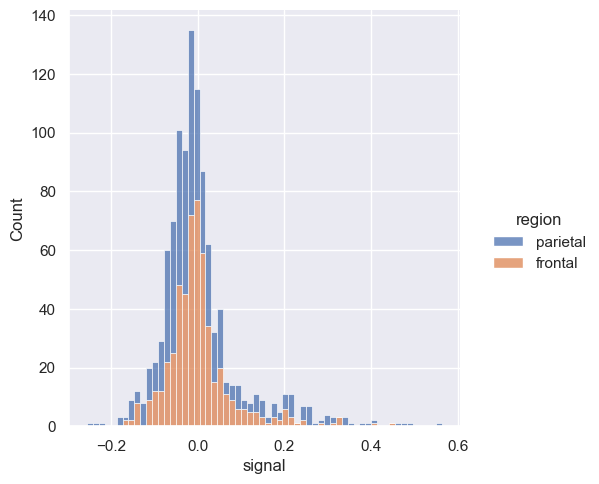

In [36]:
sns.displot(fmri, x='signal', hue="region", multiple='stack')

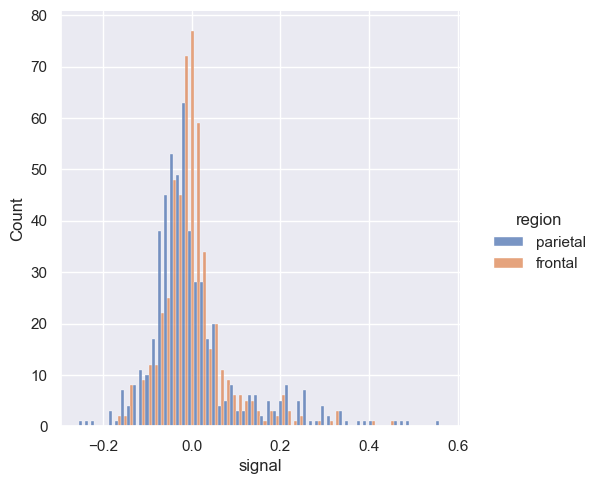

In [37]:
sns.displot(fmri, x='signal', hue="region", multiple='dodge')

Rozkłady możemy też pokazać na dwóch osobnych wykresach.

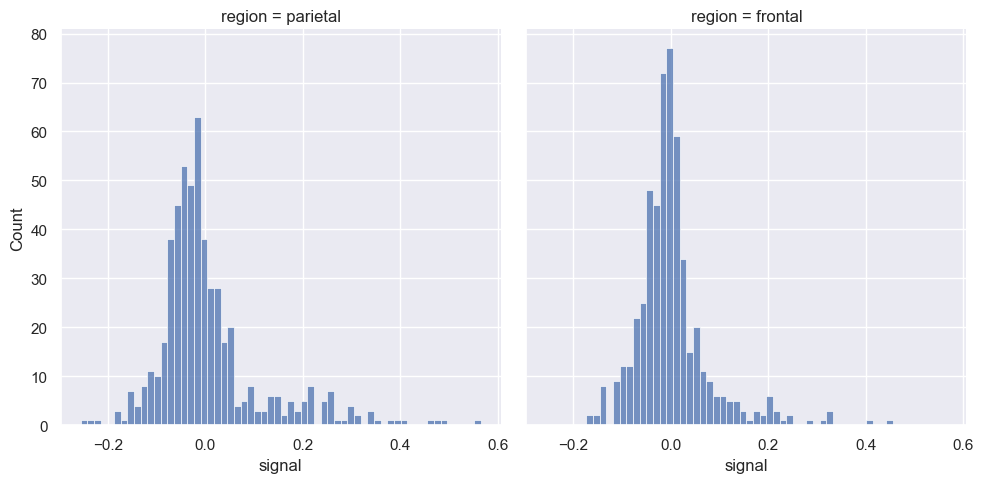

In [38]:
sns.displot(fmri, x='signal', col="region")

### Wnioski
Wybór wizualizacji zależy głównie od analityka i od problemu, który pragnie rozwiązać. Róznego rodzaju dane wymagają róznego podejścia.

Wartym zaznaczenia jest jeszcze jeden przydatny parametr, mianowicie stat. Umożliwia on nam zmianę sposobu wyświetlenia zmiennej z domyślnej count na density lub probability.

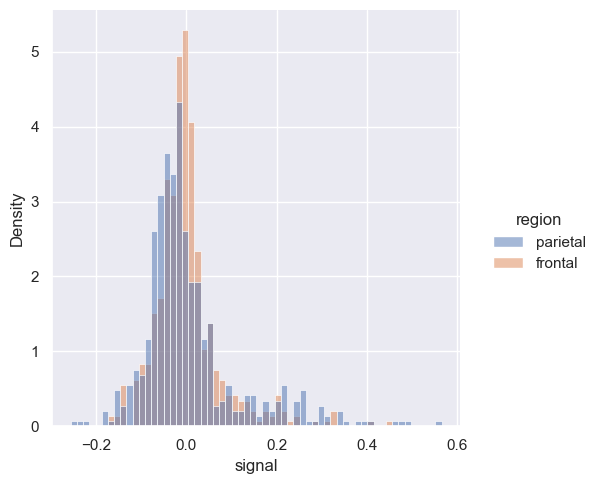

In [39]:
sns.displot(fmri, x='signal', hue="region", stat='density')

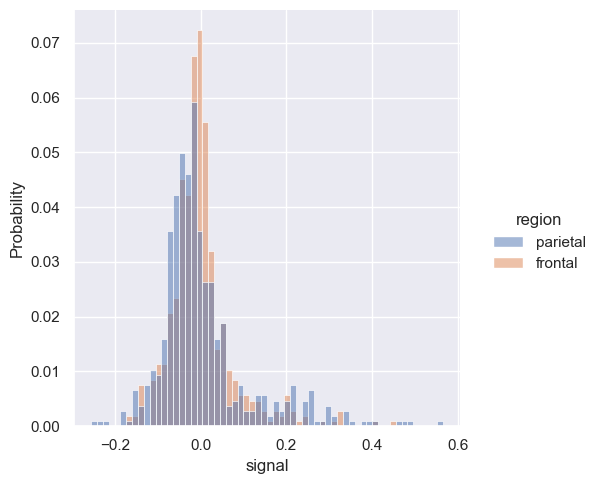

In [40]:
sns.displot(fmri, x='signal', hue="region", stat='probability')

### Gęstość rozkładu

Histogram ma na celu przybliżenie podstawowej funkcji gęstości prawdopodobieństwa, która wygenerowała dane, poprzez grupowanie i liczenie obserwacji. Szacowanie gęstości jądra (KDE) przedstawia inne rozwiązanie tego samego problemu. Zamiast używać oddzielnych przedziałów, wykres KDE wygładza obserwacje za pomocą jądra Gaussa, tworząc ciągłe oszacowanie gęstości rozkładu.

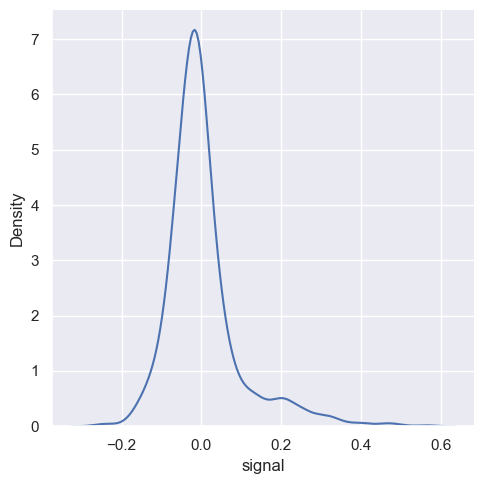

In [41]:
sns.displot(fmri, x='signal', kind='kde')

Podobnie jak w przypadku histogramu, wykres kde posiada parametr bw_adjust (parametr wygładzenia), który spełnia podobną rolę co binwidth lub bins dla histogramu. Ustawnienie tego parametru na zbyt niskim poziomie spowoduje nadmierne dopasowanie dodanych, w odwrotnym przypadku nadrmierne wygładzenie spowoduję wymazanie znaczących cech rozkładu.

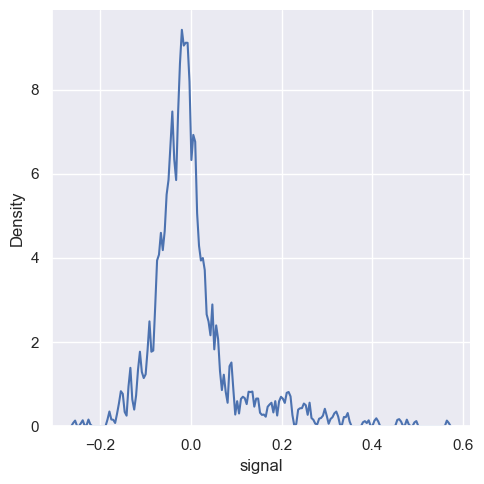

In [42]:
sns.displot(fmri, x='signal', kind='kde', bw_adjust=0.1)

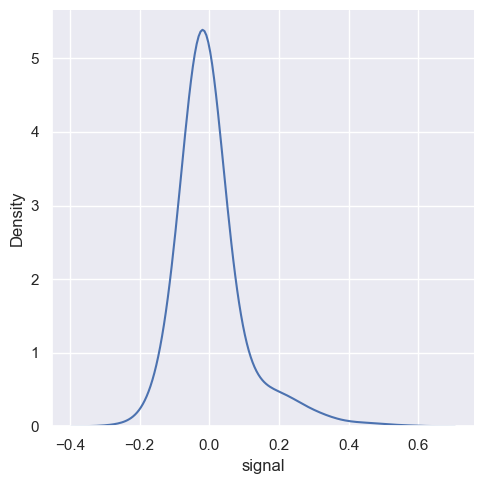

In [43]:
sns.displot(fmri, x='signal', kind='kde', bw_adjust=2)

Rozkład gęstości ma podobne funkcjonalności jak wyżej przedstawiony histogram. Oto kilka z nich:

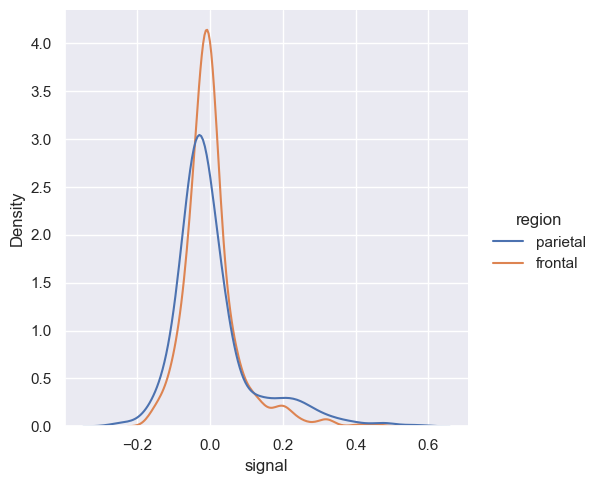

In [44]:
sns.displot(fmri, x="signal", hue="region", kind="kde")

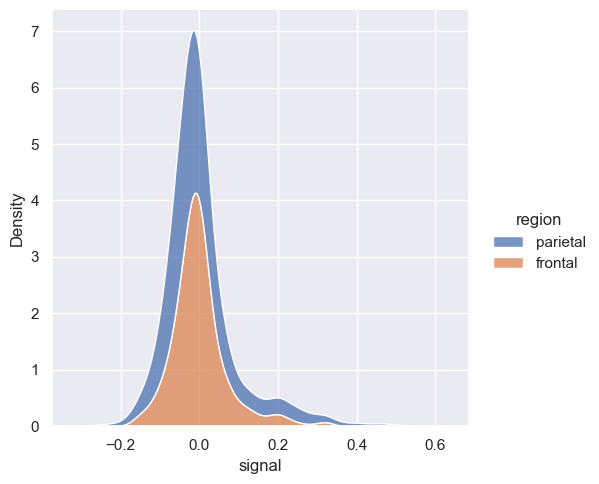

In [45]:
sns.displot(fmri, x="signal", hue="region", multiple='stack', kind="kde")

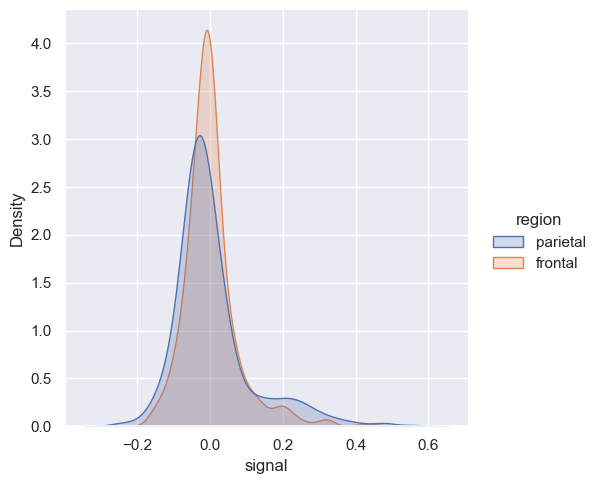

In [46]:
sns.displot(fmri, x="signal", hue="region", fill=True, kind="kde")

Bardzo częstym podejściem podczas wizualizacji danych jest skorzystanie z obu typów wykresu jednocześnie.

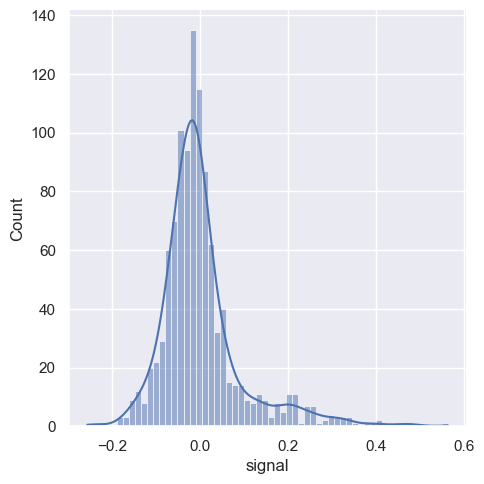

In [47]:
sns.displot(fmri, x="signal", kde=True)

### Dystrybuanta rozkładu